# Problem Statement 
Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
<br>
2) Change the minimum length in apriori algorithm
<br>
3) Visulize the obtained rules using different plots 

In [1]:
# !pip install --upgrade ipykernel

In [2]:
#import neceassay library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')


In [3]:
#load the data from my github repositery 
books = pd.read_csv("https://raw.githubusercontent.com/AliHumadi2000/Association-rule/main/book.csv")

In [4]:
books.head()# explore first 5 observetion

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
#dataset shape 
[r,c]=books.shape
print("Number of rows: ",r)
print("Number of columns: ",c)

Number of rows:  2000
Number of columns:  11


In [6]:
#basic statistics of the entire dataset
books.describe().T

,count,mean,std,min,25%,50%,75%,max
ChildBks,2000.0,0.4230,0.494159,0.0,0.0,0.0,1.0,1.0
YouthBks,2000.0,0.2475,0.431668,0.0,0.0,0.0,0.0,1.0
CookBks,2000.0,0.4310,0.495340,0.0,0.0,0.0,1.0,1.0
DoItYBks,2000.0,0.2820,0.450086,0.0,0.0,0.0,1.0,1.0
RefBks,2000.0,0.2145,0.410578,0.0,0.0,0.0,0.0,1.0
ArtBks,2000.0,0.2410,0.427797,0.0,0.0,0.0,0.0,1.0
GeogBks,2000.0,0.2760,0.447129,0.0,0.0,0.0,1.0,1.0
ItalCook,2000.0,0.1135,0.317282,0.0,0.0,0.0,0.0,1.0
ItalAtlas,2000.0,0.0370,0.188809,0.0,0.0,0.0,0.0,1.0
ItalArt,2000.0,0.0485,0.214874,0.0,0.0,0.0,0.0,1.0


In [7]:
#data processing: check if any miss data or any duplication
books.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [8]:
books[books.duplicated()] #there is around 1680 rows duplicated 

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
10,0,0,0,0,0,0,0,0,0,0,0
11,0,0,1,0,0,0,1,0,0,0,0
12,1,0,0,0,0,1,0,0,0,0,1
15,1,1,1,0,0,0,1,0,0,0,0
17,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1994,0,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [9]:
#dataset Data type
books.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

## using Graph to plot the data and understand it 

In [10]:
#install mlxtend library if not exist in your machine

# !pip install mlxtend 

C:\Users\Ali\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


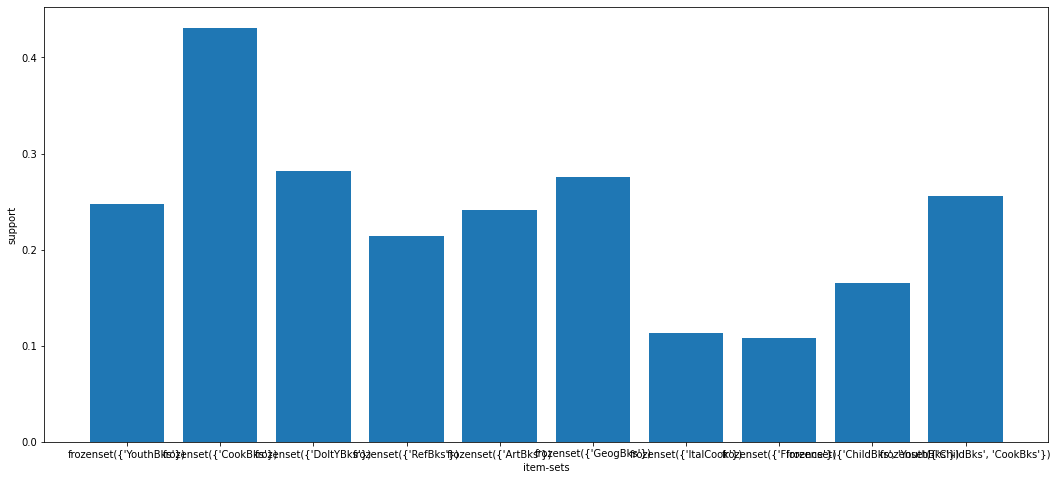

In [11]:
#declare it and its parameters
import mlxtend
from mlxtend.frequent_patterns import apriori 
from mlxtend.frequent_patterns import association_rules
#plot support 
plt.figure(figsize=(18,8))
frequent_itemsets=apriori(books,min_support=0.05,use_colnames=True,max_len=3)
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11])
plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [12]:
#lift 
rules = association_rules(frequent_itemsets,metric='lift',min_threshold=1)

In [13]:
#function to sort the list 
def to_list(i):
     return(sorted(list(i)))
  

In [14]:
#fot antecedents col+consequents 
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)
ma_X = ma_X.apply(sorted)
#convert it to list 
rules_sets = list(ma_X)

In [15]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [16]:
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [17]:
rules_no_redudancy = rules.iloc[index_rules,:]

In [18]:
#final result 
rules_no_redudancy.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
258,"(ArtBks, CookBks)",(ItalCook),0.1670,0.1135,0.0565,0.338323,2.980822,0.037545,1.339778
234,"(DoItYBks, CookBks)",(ItalCook),0.1875,0.1135,0.0585,0.312000,2.748899,0.037219,1.288517
66,"(ChildBks, YouthBks)",(RefBks),0.1650,0.2145,0.0830,0.503030,2.345130,0.047608,1.580579
186,"(DoItYBks, YouthBks)",(RefBks),0.1155,0.2145,0.0580,0.502165,2.341093,0.033225,1.577830
108,"(ItalCook, ChildBks)",(CookBks),0.0850,0.4310,0.0850,1.000000,2.320186,0.048365,inf
34,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
114,"(DoItYBks, ChildBks)",(RefBks),0.1840,0.2145,0.0900,0.489130,2.280328,0.050532,1.537574
144,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
138,"(ChildBks, GeogBks)",(RefBks),0.1950,0.2145,0.0940,0.482051,2.247325,0.052172,1.516559
252,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063


In [19]:
#laod the dataset from github repositery 
movies = pd.read_csv("https://raw.githubusercontent.com/AliHumadi2000/Association-rule/main/my_movies.csv")

In [20]:
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [21]:
movies.tail()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [22]:
[r,c]=movies.shape
print('number of rows: ',r)
print('Number of columns: ',c)

number of rows:  10
Number of columns:  15


# Too less amount of Data and number of Columns greater than rows

In [23]:
movies.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
V1,10,4,Gladiator,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V2,10,5,Patriot,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V3,7,4,Sixth Sense,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V4,2,1,Green Mile,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V5,1,1,LOTR2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sixth Sense,10.0,NaN,NaN,NaN,0.6,0.516398,0.0,0.0,1.0,1.0,1.0
Gladiator,10.0,NaN,NaN,NaN,0.7,0.483046,0.0,0.25,1.0,1.0,1.0
LOTR1,10.0,NaN,NaN,NaN,0.2,0.421637,0.0,0.0,0.0,0.0,1.0
Harry Potter1,10.0,NaN,NaN,NaN,0.2,0.421637,0.0,0.0,0.0,0.0,1.0
Patriot,10.0,NaN,NaN,NaN,0.6,0.516398,0.0,0.0,1.0,1.0,1.0


In [24]:
movies.isnull().sum()# check null value

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [25]:
# ignoring all categorical data
movies=movies.iloc[:, 5:]

In [26]:
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [27]:
movies.isnull().sum()# check null value again

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [28]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [29]:
movies.shape[0]#rows

10

In [30]:
movies.shape[1]#columns

10

C:\Users\Ali\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


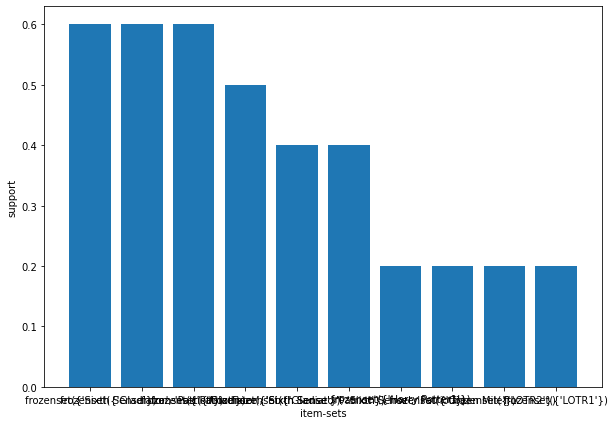

In [31]:
#print support for movie dataset
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets=apriori(movies,min_support=0.05,use_colnames=True,max_len=3)
frequent_itemsets.sort_values('support',ascending=False,inplace=True)
plt.figure(figsize=(10,7))
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11])
plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()


In [32]:
#lift 
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)

In [33]:
#sort and convert to list accordiing to lift 
def to_list(i):
    return (sorted(list(i)))

In [34]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)
ma_X = ma_X.apply(sorted)
rules_sets = list(ma_X)

In [35]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [36]:
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [37]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

In [38]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
38,"(LOTR2, Sixth Sense)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
72,(LOTR),(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
12,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
114,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
48,"(LOTR1, Harry Potter1)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
80,"(Gladiator, LOTR)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
118,"(LOTR2, Harry Potter1)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
98,(LOTR1),(Green Mile),0.2,0.2,0.1,0.5,2.5,0.06,1.6
60,"(LOTR2, LOTR1)",(Harry Potter1),0.2,0.2,0.1,0.5,2.5,0.06,1.6
112,(LOTR2),(Harry Potter1),0.2,0.2,0.1,0.5,2.5,0.06,1.6
